# Preprocessing Importance on Classification:
Preprocessing is a central part in any Natural Language Processing task. In order to extract relevant information from data, it is extremely important to process it. This proprocess task usually includes using methods such as tokenization, lowercasing, stemming, lemmatization, removing stopwords and part-of-speech filtering.

In this notebook, we will use the dataset "Amazon Fine Food Reviews" from Kaggle (https://www.kaggle.com/snap/amazon-fine-food-reviews). "This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories."

We have already made the train/test split for you with 75000 examples for training and 5000 for testing. The train and test corpus labels are scores from 1-5 with 1 meaning the review is bad/negative and 5 meaning the review is good/positive, thereby the goal is to create a very simple classifier that predicts a review score.

#### Note:
The major goal for this notebook is for you to understand well all the preprocessing steps requiered for working with text! 

# Data Import

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib

In [32]:
amazon_df_train = pd.read_csv('data/dataset_amazon_train.csv')
amazon_df_test = pd.read_csv('data/dataset_amazon_test.csv')

In [33]:
amazon_df_train.head(5)

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
amazon_df_train = pd.DataFrame(data=amazon_df_train, columns=['Score', 'Text'])
amazon_df_test = pd.DataFrame(data=amazon_df_test, columns=['Score', 'Text'])

In [35]:
amazon_df_train[40:43]

,Score,Text
40,5,The variety packs taste great!<br /><br />I ha...
41,5,McCann's makes oatmeal for every oatmeal conno...
42,5,I have McCann's Oatmeal every morning and by o...


# Exploratory Analysis

## Score (Dependent feature)

In [36]:
(amazon_df_train['Score']).max()

5

In [37]:
(amazon_df_train['Score']).min()

1

In [38]:
(amazon_df_train['Score']).mean()

4.14984

In [39]:
(amazon_df_train['Score']).std()

1.3231570772192345

In [40]:
(amazon_df_train['Score']).median()

5.0

In [41]:
(amazon_df_train['Score']).unique()

array([5, 1, 4, 2, 3])

In [42]:
amazon_df_train['Score'].describe()

count    75000.000000
mean         4.149840
std          1.323157
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: Score, dtype: float64

<Axes: >

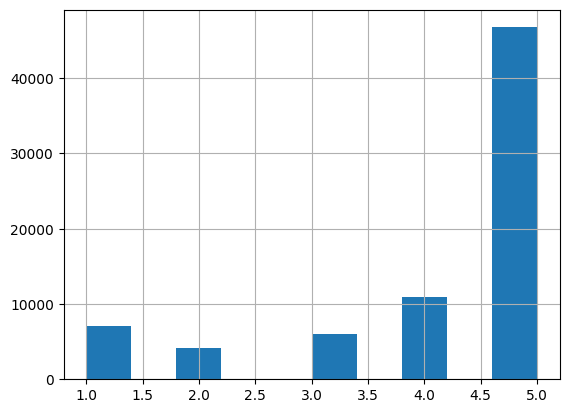

In [43]:
amazon_df_train['Score'].hist()

<Axes: >

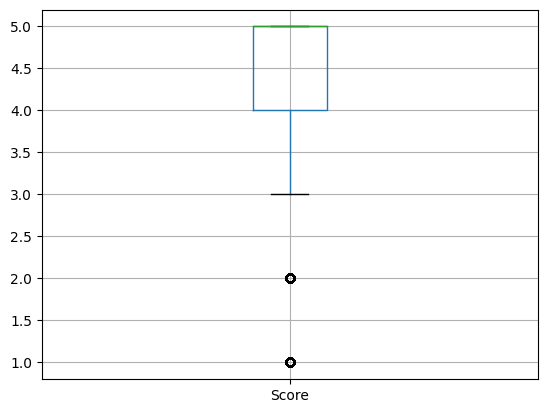

In [44]:
amazon_df_train.boxplot(['Score'])

In [45]:
amazon_df_train['Score'].isna().sum() 

0

## Text (Independent features)

In [46]:
amazon_df_train['Text'][10]

"I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!"

In [47]:
amazon_df_train['Text'].isna().sum() 

0

### Word Count
Lets start by splitting our texts into tokens and count how many tokens exist in each document.

In [48]:
# Fetch wordcount for each abstract
amazon_df_train['word_count']  = amazon_df_train['Text'].apply(lambda x: len(str(x).split(" ")))
amazon_df_train[['Text','word_count']].head()

,Text,word_count
0,I have bought several of the Vitality canned d...,49
1,Product arrived labeled as Jumbo Salted Peanut...,31
2,This is a confection that has been around a fe...,99
3,If you are looking for the secret ingredient i...,43
4,Great taffy at a great price. There was a wid...,30


### Descriptive Statistics of word count

In [49]:
amazon_df_train.word_count.describe()

count    75000.000000
mean        82.350347
std         78.830345
min          6.000000
25%         35.000000
50%         59.000000
75%        101.000000
max       2640.000000
Name: word_count, dtype: float64

<Axes: >

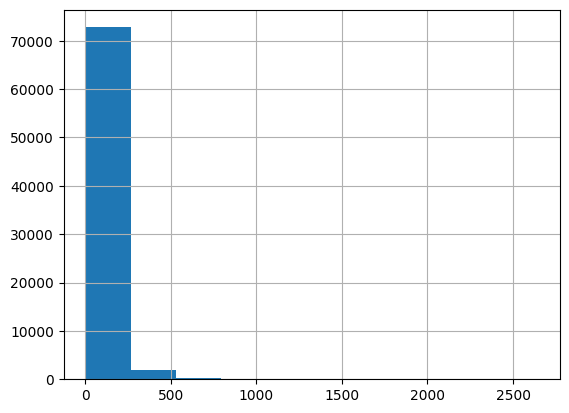

In [50]:
amazon_df_train['word_count'].hist()

In [51]:
all_words = ' '.join(amazon_df_train['Text']).split()

In [52]:
freq = pd.Series(all_words).value_counts()

In [53]:
freq.sort_values(ascending=False)[0:10]

the    215577
I      182272
and    162716
a      154151
to     131242
of     105146
is      94610
it      82415
for     68639
in      67188
Name: count, dtype: int64

In [54]:
freq.index[0:10]

Index(['the', 'I', 'and', 'a', 'to', 'of', 'is', 'it', 'for', 'in'], dtype='object')

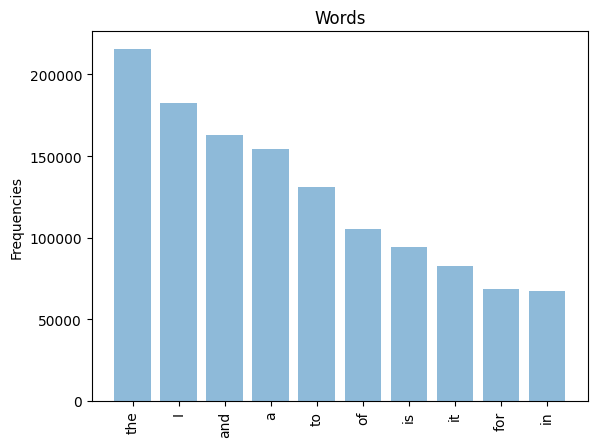

In [55]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(values, x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

# Quick stop to understand Preprocessing

## Tokenization

In [56]:
text = 'The cat on the table?'

In [57]:
text.split()

['The', 'cat', 'on', 'the', 'table?']

In [58]:
#!pip install nltk

In [59]:
import nltk
from nltk.tokenize import word_tokenize

In [63]:
#nltk.download('wordnet')
#nltk.download('punkt')

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [ ]:
"""
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
"""

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [61]:
word_tokenize(text)

['The', 'cat', 'on', 'the', 'table', '?']

In [64]:
list_tokens = word_tokenize(text)

## Punctuation

In [ ]:
#!pip install string

In [65]:
import string

In [66]:
exclude = set(string.punctuation)

In [67]:
print([word for word in list_tokens if word not in exclude])

['The', 'cat', 'on', 'the', 'table']


In [73]:
list_tokens = [word for word in list_tokens if word not in exclude]
list_tokens

['the', 'cat', 'on', 'the', 'table']

## Lowercasing

In [74]:
text

'The cat on the table?'

In [75]:
text.lower()

'the cat on the table?'

In [76]:
text.upper()

'THE CAT ON THE TABLE?'

In [77]:
list_tokens = [word.lower() for word in list_tokens]

## Stop Words

In [78]:
from nltk.corpus import stopwords

In [ ]:
#nltk.download('stopwords')

In [80]:
stop = set(stopwords.words('english'))

In [81]:
[word for word in list_tokens if word not in stop]

['cat', 'table']

In [82]:
[word for word in list_tokens if word in stop]

['the', 'on', 'the']

In [83]:
list_tokens = [word for word in list_tokens if word not in stop]

## Regular Expressions

In [84]:
import re

In [85]:
ex = 'I paid $10 for it.'
ex2 = 'The change was $5.'

In [86]:
normalized_text = re.sub('[$€£]\d+', '#COST', ex)
print(normalized_text)

I paid #COST for it.


In [87]:
def norm_cost(text):
    norm_text = re.sub('[$€£]\d+', '#COST', text)
    return norm_text

In [88]:
norm_ex = norm_cost(ex)
print(norm_ex)

I paid #COST for it.


In [89]:
norm_ex2 = norm_cost(ex2)
print(norm_ex2)

The change was #COST.


## Stemming and Lemmatization

In [90]:
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
#nltk.download('omw-1.4')

In [91]:
stemmer = SnowballStemmer('english')

In [92]:
lemma = WordNetLemmatizer()

In [93]:
list_of_words = ['consulting', 'consultants', 'consultations', 'consultive']

In [94]:
for word in list_of_words:
    print(f"Lemma of {word} is {lemma.lemmatize(word)}")
    print(f"Stem of {word} is {stemmer.stem(word)}")
    print('--------------------New word----------------')

Lemma of consulting is consulting
Stem of consulting is consult
--------------------New word----------------
Lemma of consultants is consultant
Stem of consultants is consult
--------------------New word----------------
Lemma of consultations is consultation
Stem of consultations is consult
--------------------New word----------------
Lemma of consultive is consultive
Stem of consultive is consult
--------------------New word----------------


# Now lets apply these Preprocessing steps to the Reviews corpus

In [95]:
from tqdm import tqdm

def clean(text_list, lemmatize, stemmer):
    
    updates = []
    
    for j in tqdm(text_list):
        
        text = j
        
        #LOWERCASE TEXT
        text = text.lower()
        
        #REMOVE NUMERICAL DATA and PUNCTUATION
        text = re.sub("[^a-zA-Z]"," ", text )
        text = re.sub("br", "", text)
        
        #REMOVE STOPWORDS
        text = " ".join([word for word in text.split() if word not in stop])
        
        #Lemmatize
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        #Stemming
        if stemmer:
            text = " ".join(stemmer.stem(word) for word in text.split())
            
        updates.append(text)
        
    return updates

In [96]:
updates = clean(amazon_df_train['Text'], lemmatize = True, stemmer = False)

100%|█████████████████████████████████████████████████████████████████████| 75000/75000 [00:06<00:00, 12428.44it/s]


In [97]:
updates[40]

'variety pack taste great every morning cent per meal understand everyone earth buying stuff maple sugar terrific followed apple cinnamon followed regular get tired ole thing taste great boil water small pot empty packet bowl pour boiling water watch expand x size taste really good take minute prepare sure everyone earth convenient healthy quick excellent quality extremely cheap'

In [98]:
amazon_df_train['Text'][40]

"The variety packs taste great!<br /><br />I have them every morning. At $0.30 cents per meal, I don't understand why everyone on earth isn't buying this stuff up.<br /><br />Maple and brown sugar is terrific, followed by apples and cinnamon, followed by regular. You don't get tired of the same ole thing, and they taste great.<br /><br />I just boil water from a small pot, empty the packet or 2 in a bowl, pour in boiling water, and watch it expand to 2x its size!<br /><br />Taste really good and takes minutes to prepare.<br /><br />Not sure why everyone on earth isn't this. Convenient, healthy, very quick, excellent quality, and extremely cheap..."

In [99]:
def update_df(dataframe, list_updated):
    dataframe.update(pd.DataFrame({"Text": list_updated}))

In [100]:
amazon_df_train = amazon_df_train.drop(['word_count'], axis=1)
update_df(amazon_df_train, updates)
amazon_df_train

,Score,Text
0,5,bought several vitality canned dog food produc...
1,1,product arrived labeled jumbo salted peanut pe...
2,4,confection around century light pillowy citrus...
3,2,looking secret ingredient robitussin believe f...
4,5,great taffy great price wide assortment yummy ...
...,...,...
74995,5,pound dog buy count box time dog chew munching...
74996,5,shiba love three week period observed reasonab...
74997,5,good price sure help teeth one dog teeth clean...
74998,5,little pom absolutely love greenies dental che...


# Define training features - Bag of Words (Bow)
Each word is a feature. Our feature space is defined by our vocabulary. Documents/pieces of text will be represented as sparse vectors.

In [106]:
#!pip install scikit-learn

  Using cached scikit_learn-1.2.2-cp310-cp310-macosx_12_0_arm64.whl (8.5 MB)
  Using cached scipy-1.10.1-cp310-cp310-macosx_12_0_arm64.whl (28.8 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [107]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
#CountVectorizer?

### Create BoW from train corpus

In [108]:
bow = CountVectorizer(binary=True)
X = bow.fit_transform(amazon_df_train["Text"])

In [109]:
X

<75000x41899 sparse matrix of type '<class 'numpy.int64'>'
	with 2456624 stored elements in Compressed Sparse Row format>

In [110]:
print(X[10:13].toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [112]:
# print(bow.get_feature_names()[20000:20022])
print(bow.get_feature_names_out()[20000:20022])

['klefje' 'klein' 'kleritea' 'klg' 'klinking' 'klm' 'klown' 'kluski'
 'klute' 'klutz' 'km' 'kmart' 'kmarts' 'kmr' 'kn' 'knack' 'knapsack'
 'knave' 'knaw' 'knawing' 'knd' 'knead']


# Define labels

In [113]:
y = np.array(amazon_df_train['Score'])

In [114]:
y[0:10]

array([5, 1, 4, 2, 5, 4, 5, 5, 5, 5])

In [115]:
len(y)

75000

# Train Classifier

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#KNeighborsClassifier?

In [117]:
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

In [118]:
modelknn.fit(X,y)

KNeighborsClassifier(metric='cosine', n_neighbors=10, weights='distance')

# Predict with 2 examples

In [119]:
test_sentences = ['The restaurant is good.', "Terrible restaurant!"]

### Preprocess

In [ ]:
test_clean = clean(test_sentences, lemmatize = True, stemmer = False)

In [ ]:
test_clean

### Transform into vectors - apply BoW

In [120]:
test = bow.transform(test_sentences)

In [121]:
test.shape

(2, 41899)

### Predict - apply KNN

In [122]:
predict = modelknn.predict(test)

In [123]:
predict

array([5, 1])

In [124]:
for review, score in zip(test_sentences, predict):
    print(f'The predicted score for the review: "{review}", is {score}.')

The predicted score for the review: "The restaurant is good.", is 5.
The predicted score for the review: "Terrible restaurant!", is 1.


# Predict for Test corpus

In [125]:
update_df(amazon_df_test, clean(amazon_df_test['Text'], lemmatize = True, stemmer = False))

100%|███████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 11531.56it/s]


In [126]:
X_test = bow.transform(amazon_df_test['Text'])
y_test = np.array(amazon_df_test['Score'])

In [127]:
y_pred = modelknn.predict(X_test)

# Evaluate

In [128]:
from sklearn.metrics import classification_report

In [129]:
labels = {"Very Bad":1, "Bad":2, "Neutral":3, "Good":4, "Very Good":5}
print(classification_report(y_pred, y_test, target_names = labels.keys()))

              precision    recall  f1-score   support

    Very Bad       0.21      0.69      0.33       145
         Bad       0.09      0.42      0.15        59
     Neutral       0.09      0.46      0.16        74
        Good       0.13      0.39      0.19       214
   Very Good       0.97      0.69      0.81      4508

    accuracy                           0.67      5000
   macro avg       0.30      0.53      0.33      5000
weighted avg       0.89      0.67      0.75      5000



In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[ 100,   18,    8,    5,   14],
       [  11,   25,    8,    9,    6],
       [  12,    7,   34,    3,   18],
       [  18,   21,   25,   84,   66],
       [ 329,  212,  283,  566, 3118]])

/var/folders/bv/9rbc9m815x7_jtdrj1yms35c0000gn/T/ipykernel_34283/482435971.py:42: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


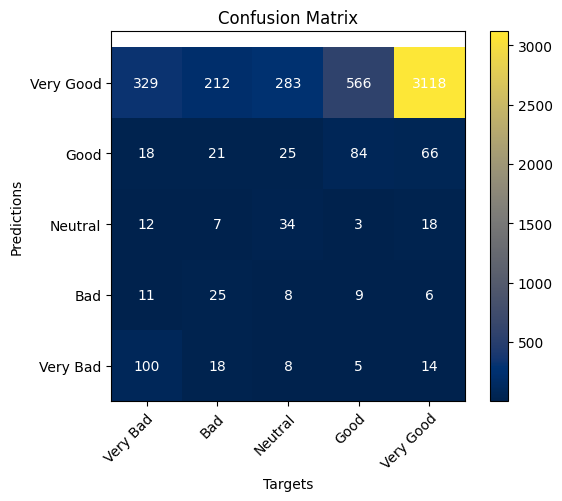

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

plot_cm(confusion_matrix(y_pred, y_test), labels.keys())